# Gallery 1: Timeseries Plots
This notebook provides a series of timeseries examples used in combination with the [TUFLOW FV Python Toolbox](https://tfv.readthedocs.io/en/latest/index.html) (tfv) package. 
To follow along on your own computer, please download the demonstration notebooks from the [TUFLOW Downloads Page](https://www.tuflow.com/downloads/#utilities). Look for the TUFLOW FV Python Toolbox download.
Installation instructions are provided on our [TUFLOW FV Python Toolbox Wiki Page](https://fvwiki.tuflow.com/TUFLOW_FV_Python_Toolbox).

In [1]:
import xarray as xr  # We utilise xarray to do all the heavy lifting 
import tfv.xarray
from pathlib import Path # We'll also make use of the `pathlib` module to assist with managing file-paths, although this is entirely optional! 
import matplotlib.pyplot as plt

##### Open TUFLOW FV Model Result

In [2]:
model_folder = Path(r'..\..\data')
model_file = 'HYD_002.nc'

fv = xr.open_dataset(model_folder / model_file, decode_times=False).tfv
#fv  # Uncomment this to display the data variables

#### Extract Time Series Data

In [3]:
locs = {
    'P1' : (159.0758, -31.3638),
    'P2' : (159.0845,  -31.3727),
    'P3' : (159.0906,  -31.3814),
    'P4' : (159.1001,  -31.3948),
    'P5' : (159.1154,  -31.4032),
    'P6' : (159.1266,  -31.4105),
    'P7' : (159.1202,  -31.4165),
    'P8' : (159.1178,  -31.4236),
}

ts = fv.get_timeseries(['H', 'V', 'TEMP'],locs)
#ts  # Uncomment this to display the data variables

Extracting timeseries, please wait: 100%|████████████████████████████████████████████| 145/145 [00:01<00:00, 87.48it/s]


#### Plot Single Time Series
Plot the depth averaged velocity at the point P2.

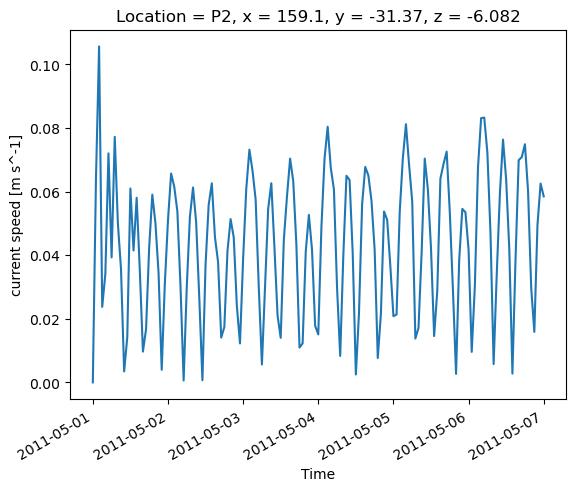

In [4]:
ts['V'].sel(Location='P2').plot()

#### Trim the Time to Plot 

In [5]:
ts['V'].sel(Time=slice('2011-05-01','2011-05-03'), Location='P2').plot()

#### Plot Time Series at Multiple Locations

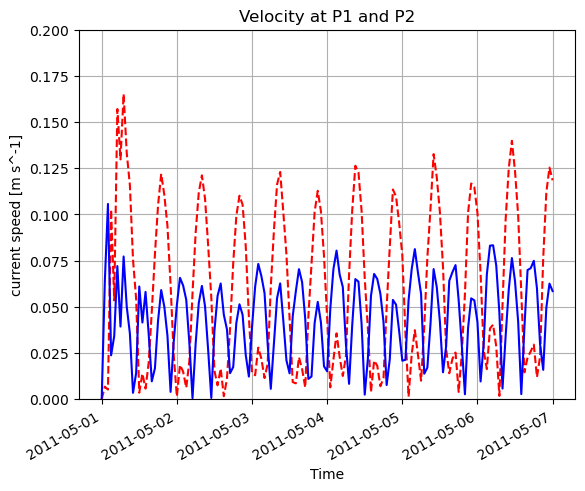

In [6]:
# Plot the time series 
ts['V'].sel(Location='P1').plot(color='red', linestyle='--')
ts['V'].sel(Location='P2').plot(color='blue')

# Tidy up the plot
plt.title('Velocity at P1 and P2')
plt.grid()
plt.ylim(0,0.2)
plt.show()

# Or you can try this for something quick
ts['V'].sel(Location=['P1','P2']).plot.line(x='Time', hue='Location')

#### Plot Time Series at All Locations

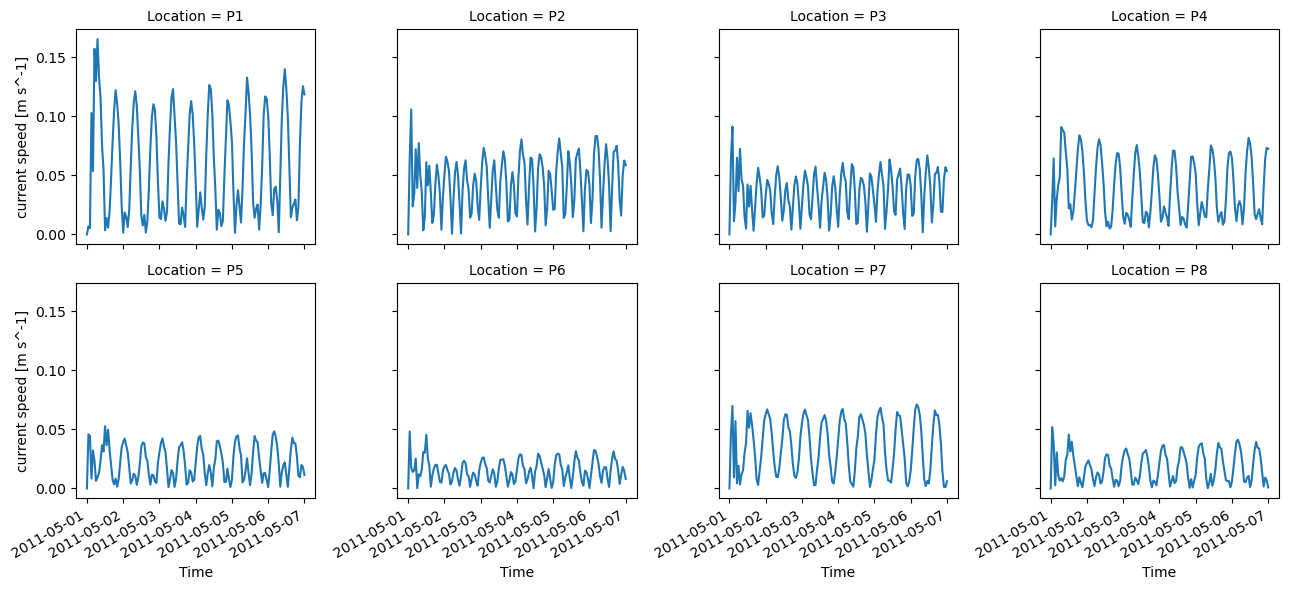

In [7]:
ts['V'].plot.line(x='Time', col='Location',col_wrap=4)

#### Plot Times Series at Multiple Depths and Save to Disk

In [8]:
# Extract the data at different depths (see also height, elevation and depth datum methods)
ts_dave = fv.get_timeseries(['V', 'TEMP','SAL'],locs,datum='sigma',limits=(0,1))  #   Full depth averaged
ts_bot_10pct = fv.get_timeseries(['V', 'TEMP','SAL'],locs,datum='sigma',limits=(0,0.1))  # 10% of water depth near bed
ts_top_10pct = fv.get_timeseries(['V', 'TEMP','SAL'],locs,datum='sigma',limits=(0.9,1))  # 10% of water depth near surface

Extracting timeseries, please wait: 100%|████████████████████████████████████████████| 145/145 [00:01<00:00, 91.38it/s]


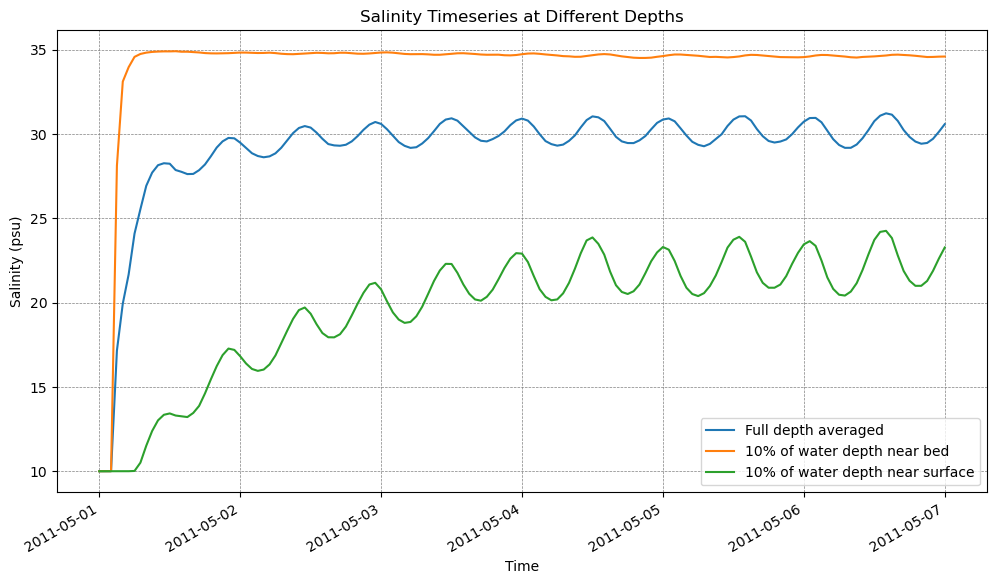

In [9]:
# Plot the salinity timeseries in three colours on a plot
fig, ax = plt.subplots(figsize=(12,6))
ts_dave['SAL'].sel(Location='P2').plot(ax=ax, label='Full depth averaged')
ts_bot_10pct['SAL'].sel(Location='P2').plot(ax=ax, label='10% of water depth near bed')
ts_top_10pct['SAL'].sel(Location='P2').plot(ax=ax, label='10% of water depth near surface')

ax.legend()
ax.set_ylabel('Salinity (psu)')
ax.set_xlabel('Time')
ax.set_title('Salinity Timeseries at Different Depths')
ax.grid(color='grey', linestyle='--', linewidth=0.5)

plt.show()

# Save the plot to a jpg file
fig.savefig(Path('./plots') / 'salinity_timeseries.jpg', dpi=300)


#### Convert to Pandas Dataframe

In [10]:
ts_df = ts.to_dataframe()
# ts_df.head()  # Uncomment if you'd like to see a description of the pandas DataFrame


This concludes the examples on time series plotting.